### Imports & Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
white_wine_no_out = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\white_wine_no_out.csv", sep=',')
white_wine_no_out_tsd = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\white_wine_no_out_tsd.csv", sep=',')

### Anova

### Skewness & Kurtosis


In [5]:
white_wine_no_out_tsd.skew()

fixed_acidity           0.197980
volatile_acidity        0.537633
citric_acid             0.406127
residual_sugar          0.798815
chlorides               0.343614
free_sulfur_dioxide     0.385053
total_sulfur_dioxide    0.044109
density                 0.355102
pH                      0.196782
sulphates               0.619533
alcohol                 0.336733
quality                 0.211777
quality_label          -0.168452
type                    0.000000
dtype: float64

In [6]:
white_wine_no_out_tsd.kurt()

fixed_acidity          -0.026406
volatile_acidity        0.258324
citric_acid             0.717825
residual_sugar         -0.415273
chlorides               1.531014
free_sulfur_dioxide     0.014189
total_sulfur_dioxide   -0.573981
density                -0.707183
pH                     -0.233080
sulphates               0.386481
alcohol                -0.828551
quality                 0.046474
quality_label          -0.346578
type                    0.000000
dtype: float64

### Split Data


In [7]:
white_wine_no_out_tsd1 = white_wine_no_out_tsd.drop('quality', axis=1)

In [8]:
# Split data into X and Y
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Feature Scaling (left out)

Accuracy: 0.8353
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       243
           1       0.83      0.94      0.88       491
           2       1.00      0.43      0.60        37

    accuracy                           0.84       771
   macro avg       0.89      0.69      0.75       771
weighted avg       0.84      0.84      0.83       771



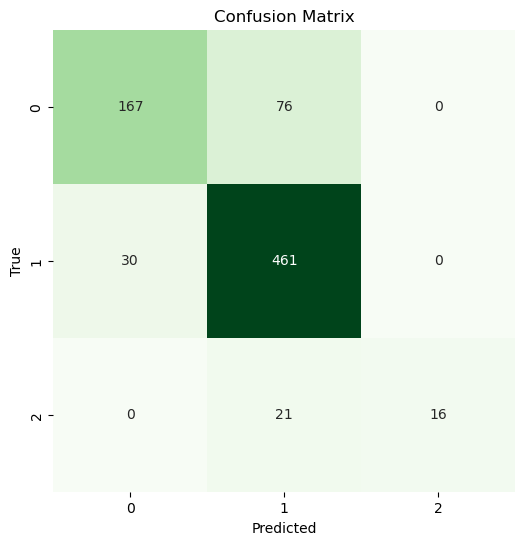

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Z-score normalization
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=453)

# Fit model on the normalized training data
RF_clf.fit(x_train_scaled, y_train)

# Make predictions on the normalized test data
preds = RF_clf.predict(x_test_scaled)

# Calculate accuracy
acc = accuracy_score(y_test, preds)
print(f'Accuracy: {acc:.4f}')

from sklearn.metrics import classification_report
print (classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Prediction

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=453)

# fit model
RF_clf.fit(x_train, y_train)

# predictions
preds = RF_clf.predict(x_test)

# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.8378728923476005


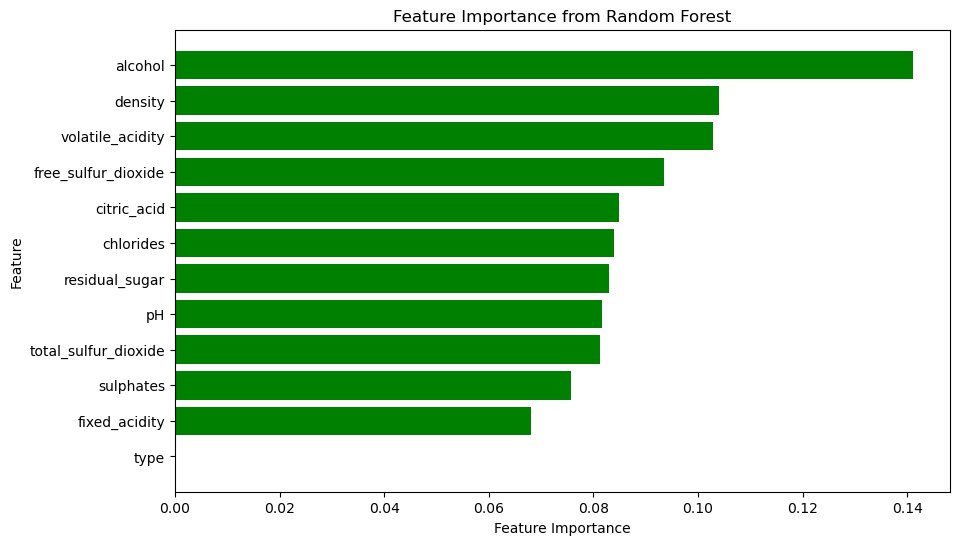

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming all_wine_cleaned3 is your dataset
# Split data into X and Y
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=453)
rf_clf.fit(x_train, y_train)

# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns  # Get the feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [22]:
from sklearn.metrics import classification_report
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76       243
           1       0.83      0.94      0.88       491
           2       1.00      0.43      0.60        37

    accuracy                           0.84       771
   macro avg       0.89      0.69      0.75       771
weighted avg       0.84      0.84      0.83       771



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[167,  76,   0],
       [ 28, 463,   0],
       [  0,  21,  16]], dtype=int64)

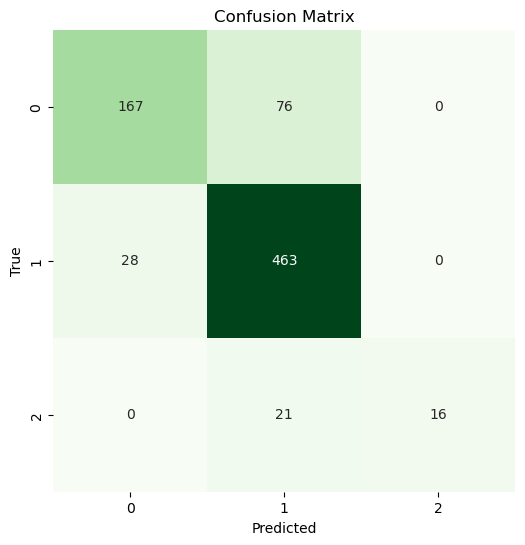

In [27]:
cm = confusion_matrix(y_test, preds)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Best parameters found by GridSearchCV: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       243
           1       0.85      0.88      0.86       491
           2       0.71      0.54      0.62        37

    accuracy                           0.82       771
   macro avg       0.78      0.72      0.75       771
weighted avg       0.82      0.82      0.82       771

Accuracy: 0.8197


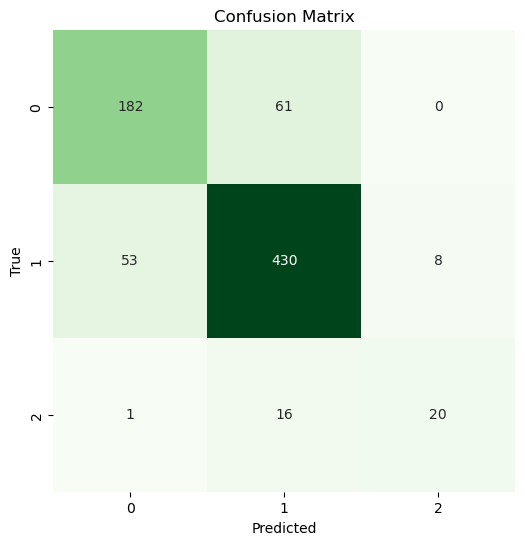

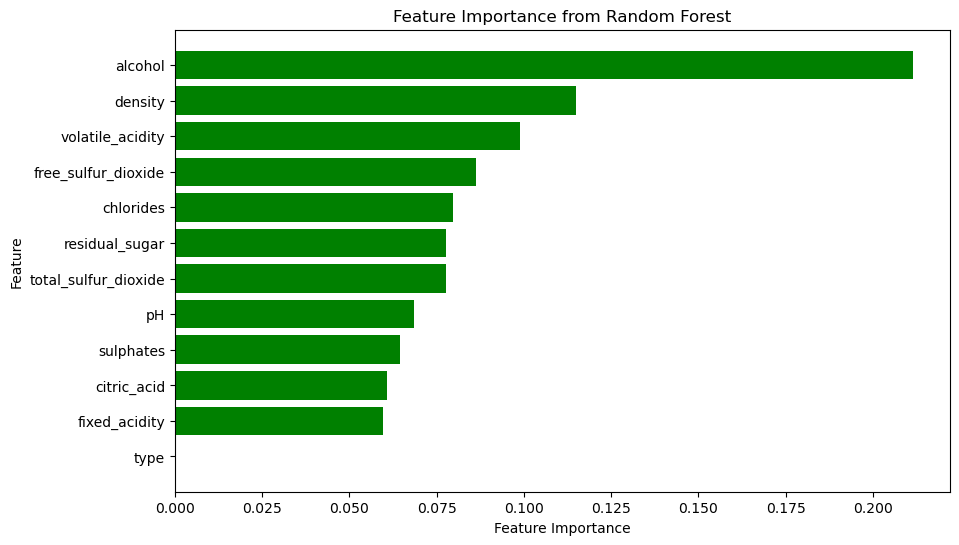

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming you already have it in a pandas DataFrame)
# For this example, 'quality_label' is the target variable, and the other features are predictors.
# Replace 'all_wine_cleaned3.csv' with the correct file name or path.

# Example:
# all_wine_cleaned3 = pd.read_csv('path/to/your/dataset.csv')

# Let's assume `red_wine_no_out` is your cleaned dataset
# Split data into features (X) and target (y)
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],           # Number of trees
    'max_depth': [10, 20, None],               # Maximum depth of trees
    'min_samples_split': [2, 10, 20],          # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],            # Minimum samples at a leaf node
    'class_weight': ['balanced', {0: 1, 1: 1, 2: 5}]  # Class weights for balancing
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='entropy', random_state=453)

# Set up GridSearchCV for hyperparameter tuning (5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

# Make predictions on the test data
preds = best_rf.predict(x_test)

# Evaluate the model's performance
print(classification_report(y_test, preds))

# Print accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature importance plot
importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


Best parameters found by GridSearchCV: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       243
           1       0.85      0.88      0.86       491
           2       0.71      0.54      0.62        37

    accuracy                           0.82       771
   macro avg       0.78      0.72      0.75       771
weighted avg       0.82      0.82      0.82       771

Accuracy: 0.8197


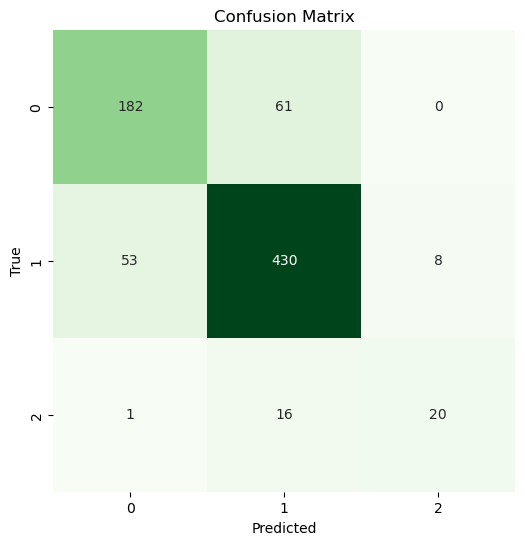

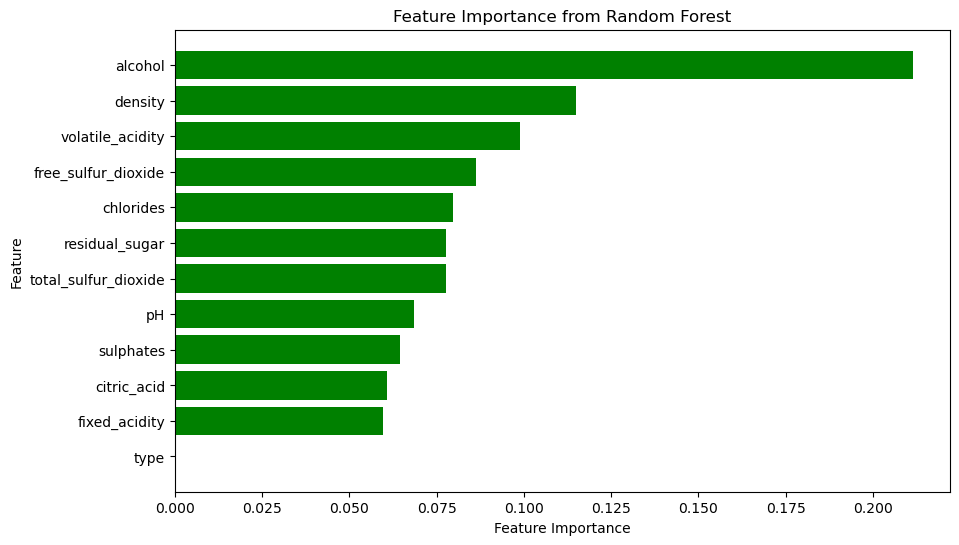

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming you already have it in a pandas DataFrame)
# For this example, 'quality_label' is the target variable, and the other features are predictors.

# Assuming `white_wine_no_out_tsd1` is your cleaned dataset
# Split data into features (X) and target (y)
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],           # Number of trees
    'max_depth': [10, 20, None],               # Maximum depth of trees
    'min_samples_split': [2, 10, 20],          # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],            # Minimum samples at a leaf node
    'class_weight': ['balanced', {0: 1, 1: 1, 2: 5}]  # Class weights for balancing
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='entropy', random_state=453)

# Set up Stratified K-Fold cross-validation (e.g., 5 folds)
strat_kfold = StratifiedKFold(n_splits=5)

# Set up GridSearchCV for hyperparameter tuning with Stratified K-Fold cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=strat_kfold, scoring='f1_macro', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

# Make predictions on the test data
preds = best_rf.predict(x_test)

# Evaluate the model's performance
print(classification_report(y_test, preds))

# Print accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature importance plot
importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()
